

### SymPy

`SymPy` is a package for symbolic calculations in python, similar to *Mathematica*. It works with expressions containing symbols.

In [7]:
from sympy import *
init_printing()

Symbols are basic bricks used to construct expressions.
Each symbol has a name used for printing expressions. Objects of the class `Symbol` should be created and assigned to python variables in order to be used in expressions. The symbol name and the name of the variable to which this symbol is assigned are two independent things, and one may write `abc=Symbol('xyz')`. But then one has to write `abc` in input expressions, while `SymPy` will write `xyz` in output ones, producing unnecessary confusion. The python variable name should better be the same as the symbol name.

In languages specifically designed for symbolic calculations, such as *Mathematica*, if a variable to which nothing has been assigned is used, it automatically means a symbol with the same name. Python has not been designed for symbolic calculations. If you use a variable to which nothing has been assigned, you will get an error message. Symbol objects have to be created explicitly.

In [8]:
x=Symbol('x')
a=x**2-1
a

Several symbols can be defined at once. The string is split at spaces.

In [9]:
y,z=symbols('y z')

Let's substitute $y+1$ for $x$.

In [10]:
a.subs(x,y+1)

### Polynomials and rational functions

`SymPy` does not expand brackets automatically. The function `expand` is used for this.

In [12]:
a=(x+y-z)**2
a

In [13]:
a=expand(a)
a

Degree of the polynomial $a$ in $x$.

In [14]:
degree(a,x)

Let's collect terms with same power of $x$ together.

In [15]:
collect(a,x)

Any polynomial with integer coefficients can be factorized into polynomials with integer coefficients (which cannot be factorized further). There exist efficient algorithms to do this.

In [17]:
a=factor(a)
a

`SymPy` does not automatically cancel ratios of polynomials by their greatest common divisor. The function `cancel` is used for this.

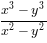

In [18]:
a=(x**3-y**3)/(x**2-y**2)
a

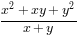

In [19]:
cancel(a)

`SymPy` does not automatically bring sums of rational expressions to common denominator. The function `together` is used for this.

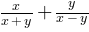

In [20]:
a=y/(x-y)+x/(x+y)
a

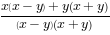

In [21]:
together(a)

The function `simplify` tries to rewrite an expression *in a simplest form*. This concept is not well defined (different forms may be considered simplest in different contexts), and there exists no algorithm for such simplification. The function `simplify` works heuristically, and it is not possible to guess in advance what simplifications it will try. It is very convenient in interactive sessions in order to check if it will succeed in rewriting an expression in some reasonably good form. But it is not desirable to use it in programs. There one should better use more specialized functions which perform well defined expression transformations.

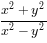

In [22]:
simplify(a)

Partial fraction decomposition with respect to $x$.

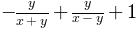

In [23]:
apart(a,x)

Let's substitute some values for the symbols $x$ and $y$.

In [24]:
a=a.subs({x:1,y:2})
a

And how much is it numerically?

In [27]:
a.n()

In [25]:
a.subs({x:1,y:2}) > a.subs({x:2,y:1})

## Elementary functions

`SymPy` automatically applies simplifications of elementary functions which are correct everywhere.

In [28]:
sin(-x)

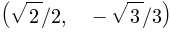

In [29]:
cos(pi/4),tan(5*pi/6)

`SymPy` can work with floating point numbers having arbitrarily high precision. Here is $\pi$ with 30 significant digits.

In [30]:
pi.n(30)

`E` is the base of natural logarithms.

In [31]:
log(1),log(E)

In [32]:
exp(log(x)),log(exp(x))

Why not $x$? Try $x=2\pi i$.

In [33]:
sqrt(0)

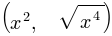

In [34]:
sqrt(x)**4,sqrt(x**4)

Why not $x^2$? Try $x=i$.

Symbols can have certain properties. E.g., they can be positive. Then `SymPy` can simplify square roots better.

In [35]:
p,q=symbols('p q',positive=True)
sqrt(p**2)

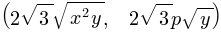

In [36]:
sqrt(12*x**2*y),sqrt(12*p**2*y)

Let the symbol $n$ be integer (`I` is the imaginary unit).

In [37]:
n=Symbol('n',integer=True)
exp(2*pi*I*n)

The method `rewrite` tries to rewrite an expression in terms of a given function.

In [38]:
cos(x).rewrite(exp),exp(I*x).rewrite(cos)

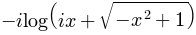

In [39]:
asin(x).rewrite(log)

The function `trigsimp` tries to rewrite a trigonometric expression *in a simplest form*. In programs it is better to use more specialized functions.

In [40]:
trigsimp(2*sin(x)**2+3*cos(x)**2)

The function `expand_trig` expands sines and cosines of sums and multiple angles.

In [41]:
expand_trig(sin(x-y)),expand_trig(sin(2*x))

The inverse transformation, rewriting products and powers of sines and cosines into expressions linear in these functions, is needed more often. Suppose we work with a truncated Fourier series.

In [43]:
a1,a2,b1,b2=symbols('a1 a2 b1 b2')
a=a1*cos(x)+a2*cos(2*x)+b1*sin(x)+b2*sin(2*x)
a

We want to square it and get a truncated Fourier series again.

In [44]:
a**2

In [47]:
a.subs({a1:1,a2:0,b1:0,b2:1})

In [48]:
a.subs({a1:1,a2:0,b1:0,b2:1}).rewrite(exp)

In [49]:
a.subs({a1:1,a2:0,b1:0,b2:1}).rewrite(exp).expand()

In [51]:
a.subs({a1:1,a2:0,b1:0,b2:1}).rewrite(exp).expand().rewrite(cos)

In [53]:
p = a.subs({a1:1,a2:0,b1:0,b2:1}).rewrite(exp).expand().rewrite(cos)
p.expand()

In [54]:
p.collect([cos(x),cos(2*x),cos(3*x),sin(x),sin(2*x),sin(3*x)])